In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline


# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

1. Defina dos funciones, una para x y otra para y. 

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.

In [24]:
# Incializzacion de parametros
v0 = 50 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8 #Aceleracion de la gravedad m/s2
params = v0, theta, u, alpha,  g, b
t = np.linspace(0, 20, 100)

In [25]:
#Posicion en x
def pos_x(t, v0, theta, u, alpha, g, b):  
  T1 =  (u * np.cos(alpha))*t
  T2 =  (1./b)*(v0*np.cos(theta) - u*np.cos(alpha))
  T3 =  1-np.exp(-b*t)
  x = T1 + T2 * T3   
  return x

#Posicion en y
def pos_y(t, v0, theta, u, alpha, g, b):  
  T1 = (1/b) * (g/b + v0 * np.sin(theta) - u*np.sin(alpha))
  T2 =  1-np.exp(-b * t)
  T3 =  (g/b - u * np.sin(alpha))*t
  y = T1*T2 - T3 
  return y 

Text(0, 0.5, 'y')

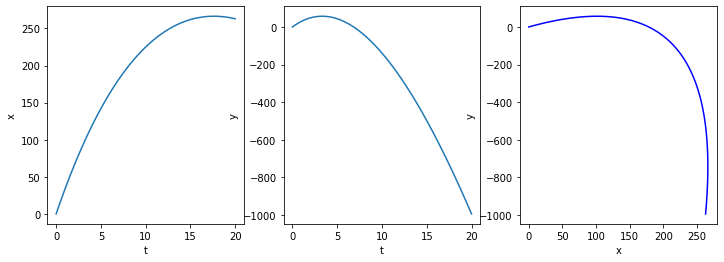

In [26]:
x = pos_x(t, *params)
y = pos_y(t, *params)

plt.figure(figsize = (12,4))
plt.subplot(131)
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("x")

plt.subplot(132)
plt.plot(t, y)
plt.xlabel("t")
plt.ylabel("y")

plt.subplot(133)
plt.plot(x, y,"b-")
plt.xlabel("x")
plt.ylabel("y")

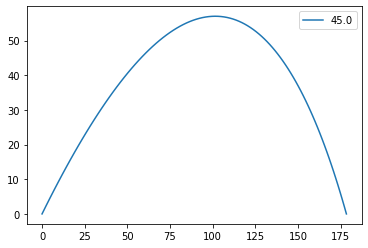

In [27]:
t_alcance = optimize.newton(pos_y, 10,  args=params)
R = pos_x(t_alcance, *params)

t=np.linspace(0,t_alcance,100)
plt.plot(pos_x(t,*params), pos_y(t, *params), label=f"{np.rad2deg(theta)}" )
plt.legend()
plt.show()



In [28]:
theta_r= np.array([10.        , 12.05128205, 14.1025641 , 16.15384615, 18.20512821,\
       20.25641026, 22.30769231, 24.35897436, 26.41025641, 28.46153846,\
       30.51282051, 32.56410256, 34.61538462, 36.66666667, 38.71794872,\
       40.76923077, 42.82051282, 44.87179487, 46.92307692, 48.97435897,\
       51.02564103, 53.07692308, 55.12820513, 57.17948718, 59.23076923,\
       61.28205128, 63.33333333, 65.38461538, 67.43589744, 69.48717949,\
       71.53846154, 73.58974359, 75.64102564, 77.69230769, 79.74358974,\
       81.79487179, 83.84615385, 85.8974359 , 87.94871795, 90.        ])

In [29]:
R = np.array([114.09205021, 133.6067617 , 151.67449721, 168.2576939 ,
       183.32649926, 196.85846542, 208.83823555, 219.25722563,
       228.11330425, 235.41047287, 241.15854847, 245.37285036,
       248.07389237, 249.28708162, 249.04242469, 247.37424188,
       244.32088996, 239.92449375, 234.23068672, 227.28836065,
       219.14942415, 209.86857017, 199.50305207, 188.11246793,
       175.7585531 , 162.50498019, 148.41716644, 133.5620879 ,
       118.00810006, 101.82476434,  85.08268022,  67.85332228,
        50.20888191,  32.22211314,  13.96618204,  -4.48548058,
       -23.05932377, -41.68181874, -60.27959928, -78.7796008 ])

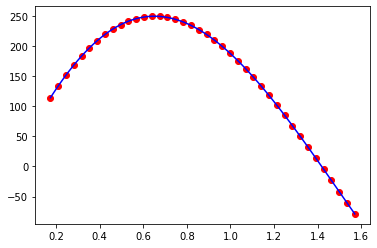

In [30]:
theta = np.deg2rad(theta_r)

p = CubicSpline(theta, R) #Interpolacion
theta_ = np.linspace(np.min(theta), np.max(theta),100) #Valores de theta

plt.plot(theta,R,"o",color='red' )
plt.plot(theta_, p(theta_),color="blue" )
#plt.xlim(0.175,1.25)
#plt.ylim(0,300)

# 2  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


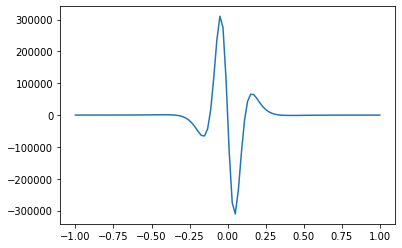

In [31]:
import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

In [49]:
x=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true).

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [61]:
df.x[20]

In [65]:
x=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])
df=pd.DataFrame({'x':x,'y':y}) #Dataframe
df

,x,y
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60
5,3.0,2.70
6,3.9,2.40
7,4.4,2.15
8,4.7,2.05
9,5.0,2.10


In [64]:
poly=lagrange(df.x,df.y) #Lagrange
poly

poly1d([-3.07453078e-11,  4.27948927e-09, -2.77283085e-07,  1.11075895e-05,
       -3.08159189e-04,  6.28589967e-03, -9.76903801e-02,  1.18284032e+00,
       -1.13160516e+01,  8.62513980e+01, -5.25812754e+02,  2.56420131e+03,
       -9.96897886e+03,  3.06776350e+04, -7.38665657e+04,  1.36777900e+05,
       -1.89850973e+05,  1.89994993e+05, -1.28683406e+05,  5.24625803e+04,
       -9.65278508e+03])

In [82]:
X=np.linspace(df.x.min(),df.x.max(),1000)

Text(0, 0.5, '$Y$')

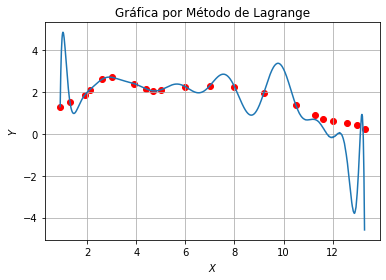

In [85]:

plt.scatter(df.x,df.y,color='red')
plt.plot(X,poly(X))
plt.grid()
plt.title("Gráfica por Método de Lagrange")
plt.xlabel("$X$")
plt.ylabel("$Y$")

Text(0, 0.5, '$Y$')

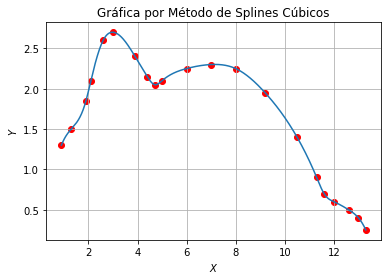

In [86]:
CS=CubicSpline(df.x,df.y)
plt.plot(X,CS(X))
plt.scatter(df.x,df.y,color='red')
plt.grid()
plt.title("Gráfica por Método de Splines Cúbicos")
plt.xlabel("$X$")
plt.ylabel("$Y$")

In [74]:
#La interpolación por Lagrage presenta oscilaciones debido a que no es tan exacta como rl método de Splines Cúbicos